In [201]:
import numpy as np
from scipy import stats,signal
from scipy.stats.stats import pearsonr
from sympy import S, symbols, printing
import random
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, PairwiseKernel, Exponentiation, RationalQuadratic,WhiteKernel, ExpSineSquared, DotProduct, Matern
import seaborn as sns
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

np.random.seed(1)

In [2]:
feature_df = pd.read_csv('total_features.csv', delimiter=',')
lambdas_df = pd.read_csv('wavelength_values.csv', delimiter=',')
feature_arr = feature_df.values
lambdas_arr = lambdas_df.values

train = feature_df.iloc[:, :40]
test = feature_df.iloc[:, 40:]

In [3]:
def noiseVisualiser(data):
    means = []
    std = []
    idx_disp = []
    for i in range(len(data)):
        means.append(np.mean(data[i]))
        std.append(np.std(data[i]))
    return means, std

means, std = noiseVisualiser(feature_arr)
cov = np.cov(feature_arr)

it = 50
x = np.random.multivariate_normal(means,cov, it)

In [225]:
#format lambdas
lambdas =[]
multilambda = []
for i in range(len(lambdas_arr)):
    lambdas.append(lambdas_arr[i][0])
for i in range(51):
    multilambda.append([lambdas])



In [189]:

n=272

x = np.linspace(398, 1000,n).reshape(-1,1)

X = np.atleast_2d(means).T
y = np.atleast_2d(lambdas).T


# Instantiate a Gaussian Process model
gp1 = GaussianProcessRegressor(kernel = RBF(length_scale=0.4, length_scale_bounds=(1, 100.0)))
gp2 = GaussianProcessRegressor(kernel = Matern(nu = 0.2))
gp3 = GaussianProcessRegressor(kernel = RationalQuadratic(length_scale=1, alpha=1000, length_scale_bounds=(1e-05, 1.0), alpha_bounds=(1e-05, 100000.0)))

# Fit to data using Maximum Likelihood Estimation of the parameters
gp1.fit(y,X)
gp2.fit(y,X)
gp3.fit(y,X)

# Make the prediction on the meshed x-axis (ask for MSE as well)
x_pred1, sigma1 = gp1.predict(x, return_std=True)
x_pred2, sigma2 = gp2.predict(x, return_std=True)
x_pred3, sigma3 = gp3.predict(x, return_std=True)

In [1]:
# Plot the function and the prediction

fig = plt.figure(figsize=(25, 15)) # normalized var
plt.errorbar(y,X, fmt='b.', markersize=7, label='Observations')
plt.plot(x, x_pred1,'y-', label='RBF Prediction')
plt.plot(x, x_pred2,'r-', label='Matern Prediction')
plt.plot(x, x_pred3,'g-', label='RationalQuadratic Prediction')
plt.xlabel('$Wavelength [nm]$', fontsize=20)
plt.ylabel('$ Light-Intensity $', fontsize=20)
plt.xlim(370, 1010)
plt.ylim(230, 1100)
plt.legend(loc='upper right', prop={'size': 20})
plt.savefig('gp_prediction.png')
plt.show()

print(test)

NameError: name 'plt' is not defined

In [193]:
#Mean squared errors

mse1 = (np.square(X - x_pred1)).mean(axis=0)
mse2 = (np.square(X - x_pred2)).mean(axis=0)
mse3 = (np.square(X - x_pred3)).mean(axis=0)
print(mse1, mse2, mse3)

[49.78352839] [75.10700494] [45.52289576]


In [258]:
#Rsquared values

R1 = gp.score(x_pred1,X)
R2 = gp.score(x_pred2,X)
R3 = gp.score(x_pred3,X)
print(R1,R2,R3)

#PCC values
P1 = pearsonr(X.ravel(),x_pred1.ravel())
P2 = pearsonr(X.ravel(),x_pred2.ravel())
P3 = pearsonr(X.ravel(),x_pred3.ravel())
print(P1,P2,P3)

-1.5786361254830559 -1.5323438339420563 -1.549291483320284
(0.999673178306819, 0.0) (0.9995085091005784, 0.0) (0.9997172005171421, 0.0)


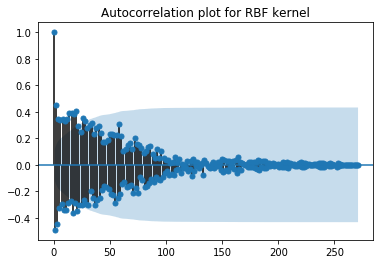

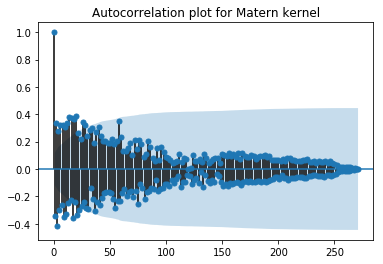

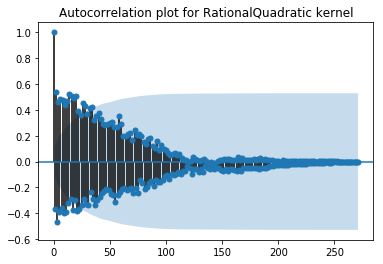

In [229]:
#AutoCorrelation plot

dfresiduals1 = pd.DataFrame(residuals1)
dfresiduals2 = pd.DataFrame(residuals2)
dfresiduals3 = pd.DataFrame(residuals3)


plot_acf(residuals1)
plt.title('Autocorrelation plot for RBF kernel')
plt.show()

plot_acf(residuals2)
plt.title('Autocorrelation plot for Matern kernel')
plt.show()

plot_acf(residuals3)
plt.title('Autocorrelation plot for RationalQuadratic kernel')
plt.show()


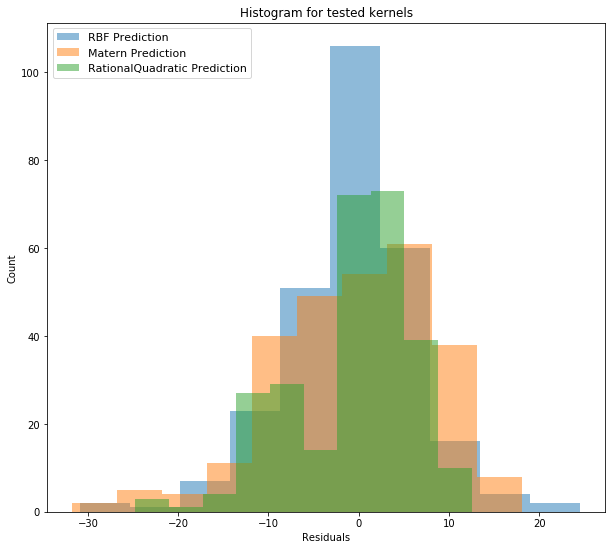

In [246]:
# reidual histogram plot
plt.figure(figsize=(10, 9))
plt.hist(residuals1,alpha=.5, label='RBF Prediction')
plt.hist(residuals2,alpha=.5, label='Matern Prediction')
plt.hist(residuals3,alpha=.5, label='RationalQuadratic Prediction')
plt.legend(loc='upper left',prop={'size': 11})
plt.title('Histogram for tested kernels')
plt.xlabel('Residuals')
plt.ylabel('Count')

plt.savefig("residual_hist.png")
plt.show()
# density plot
#residuals.plot(kind='kde')
#plt.show()

In [2]:
# residual plot

plt = plt.figure(figsize=(13, 7))
plt.axes[0] = sns.residplot(x_pred1, X, label='RBF Prediction')
plt.axes[0] = sns.residplot(x_pred2, X, label='Matern Prediction')
plt.axes[0] = sns.residplot(x_pred3, X, label='RationalQuadratic Prediction')
plt.axes[0].legend(loc='upper right', prop={'size': 10})

plt.axes[0].set_title('Residual plot for tested kernels')
plt.axes[0].set_xlabel('Fitted values [nm]')
plt.axes[0].set_ylabel('Residuals');
plt.savefig('residual_scat.png')

NameError: name 'plt' is not defined

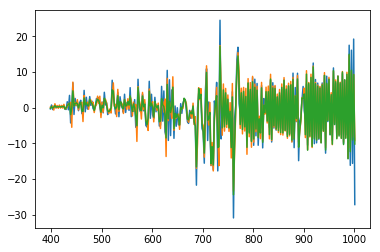

In [112]:
plt.plot(lambdas, residuals1)
plt.plot(lambdas, residuals2)
plt.plot(lambdas, residuals3)